In [1]:
import nltk
from nltk.corpus import brown

# UnigramTagger

In [2]:
brown_tagged_sents = brown.tagged_sents(categories='news') 

fd = nltk.FreqDist(brown.words(categories='news')) 
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))  
most_freq_words = fd.keys()
likely_tags = dict((word, cfd[word].max()) for word in most_freq_words) 
baseline_tagger = nltk.UnigramTagger(model=likely_tags) 
baseline_tagger.evaluate(brown_tagged_sents) 

0.9349006503968017

In [9]:
sent = brown.sents(categories='news')[3] 
baseline_tagger.tag(sent) 

[('``', '``'),
 ('Only', 'RB'),
 ('a', 'AT'),
 ('relative', 'JJ'),
 ('handful', 'NN'),
 ('of', 'IN'),
 ('such', 'JJ'),
 ('reports', 'NNS'),
 ('was', 'BEDZ'),
 ('received', 'VBD'),
 ("''", "''"),
 (',', ','),
 ('the', 'AT'),
 ('jury', 'NN'),
 ('said', 'VBD'),
 (',', ','),
 ('``', '``'),
 ('considering', 'IN'),
 ('the', 'AT'),
 ('widespread', 'JJ'),
 ('interest', 'NN'),
 ('in', 'IN'),
 ('the', 'AT'),
 ('election', 'NN'),
 (',', ','),
 ('the', 'AT'),
 ('number', 'NN'),
 ('of', 'IN'),
 ('voters', 'NNS'),
 ('and', 'CC'),
 ('the', 'AT'),
 ('size', 'NN'),
 ('of', 'IN'),
 ('this', 'DT'),
 ('city', 'NN'),
 ("''", "''"),
 ('.', '.')]

In [10]:
baseline_tagger = nltk.UnigramTagger(model=likely_tags, backoff=nltk.DefaultTagger('NN')) 

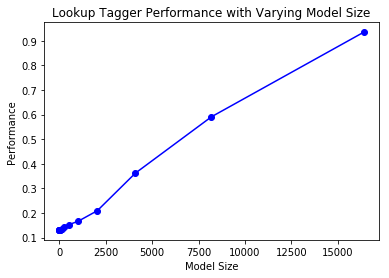

In [11]:
def performance(cfd, wordlist): 
    lt = dict((word, cfd[word].max()) for word in wordlist) 
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN')) 
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

def display(): 
    import pylab 
    words_by_freq = list(nltk.FreqDist(brown.words(categories='news'))) 
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news')) 
    sizes = 2 ** pylab.arange(15) 
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes] 
    pylab.plot(sizes, perfs, '-bo') 
    pylab.title('Lookup Tagger Performance with Varying Model Size') 
    pylab.xlabel('Model Size') 
    pylab.ylabel('Performance') 
    pylab.show() 
    
display()

# UnigramTagging 

In [3]:
brown_tagged_sents = brown.tagged_sents(categories='news') 
size = int(len(brown_tagged_sents) * 0.9) 
size

4160

In [4]:
train_sents = brown_tagged_sents[:size] 
test_sents = brown_tagged_sents[size:] 
unigram_tagger = nltk.UnigramTagger(train_sents) 
unigram_tagger.evaluate(test_sents) 

0.8118209907305891

# N-gram Tagging

In [6]:
 brown_sents = brown.sents(categories='news') 

bigram_tagger = nltk.BigramTagger(train_sents) 
bigram_tagger.tag(brown_sents[2007]) 

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'CS'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [7]:
unseen_sent = brown_sents[4203] 
bigram_tagger.tag(unseen_sent) 

[('The', 'AT'),
 ('population', 'NN'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('Congo', 'NP'),
 ('is', 'BEZ'),
 ('13.5', None),
 ('million', None),
 (',', None),
 ('divided', None),
 ('into', None),
 ('at', None),
 ('least', None),
 ('seven', None),
 ('major', None),
 ('``', None),
 ('culture', None),
 ('clusters', None),
 ("''", None),
 ('and', None),
 ('innumerable', None),
 ('tribes', None),
 ('speaking', None),
 ('400', None),
 ('separate', None),
 ('dialects', None),
 ('.', None)]

In [8]:
bigram_tagger.evaluate(test_sents)

0.10216286255357321

In [9]:
t0 = nltk.DefaultTagger('NN') 
t1 = nltk.UnigramTagger(train_sents, backoff=t0) 
t2 = nltk.BigramTagger(train_sents, backoff=t1) 
t2.evaluate(test_sents) 

0.8455098176019137

# save tagger

In [12]:
from pickle import dump 
output = open('t2.pkl', 'wb') 
dump(t2, output, -1) 
output.close() 

In [14]:
from pickle import load 
input = open('t2.pkl', 'rb') 
tagger = load(input)
input.close()
    
text = """The board's action shows what free enterprise is up against in our complex maze of regulatory laws .""" 
tokens = text.split()
tagger.tag(tokens) 

[('The', 'AT'),
 ("board's", 'NN$'),
 ('action', 'NN'),
 ('shows', 'NNS'),
 ('what', 'WDT'),
 ('free', 'JJ'),
 ('enterprise', 'NN'),
 ('is', 'BEZ'),
 ('up', 'RP'),
 ('against', 'IN'),
 ('in', 'IN'),
 ('our', 'PP$'),
 ('complex', 'JJ'),
 ('maze', 'NN'),
 ('of', 'IN'),
 ('regulatory', 'NN'),
 ('laws', 'NNS'),
 ('.', '.')]

# performance limitation

In [15]:
cfd = nltk.ConditionalFreqDist(
    ((x[1], y[1], z[0]), z[1]) for sent in brown_tagged_sents for x, y, z in nltk.trigrams(sent)) 

ambiguous_contexts = [c for c in cfd.conditions() if len(cfd[c]) > 1] 
sum(cfd[c].N() for c in ambiguous_contexts) / cfd.N()

0.049297702068029296

In [17]:
test_tags = [tag for sent in brown.sents(categories='editorial') 
             for (word, tag) in t2.tag(sent)] 

gold_tags = [tag for (word, tag) in brown.tagged_words(categories='editorial')] 
print(nltk.ConfusionMatrix(gold_tags, test_tags))

           |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

# span sentence boundary tagging

In [2]:
brown_tagged_sents = brown.tagged_sents(categories='news') 
brown_sents = brown.sents(categories='news')
size = int(len(brown_tagged_sents) * 0.9) 
train_sents = brown_tagged_sents[:size] 
test_sents = brown_tagged_sents[size:] 
t0 = nltk.DefaultTagger('NN') 
t1 = nltk.UnigramTagger(train_sents, backoff=t0) 
t2 = nltk.BigramTagger(train_sents, backoff=t1) 
t2.evaluate(test_sents) 

0.8464068573706768

# brill tagger

In [5]:
nltk.tag.brill

<module 'nltk.tag.brill' from 'd:\\programfiles\\python35\\lib\\site-packages\\nltk\\tag\\brill.py'>